#  dataset without data doppelganger

In [11]:
import numpy as np
import pandas as pd
#please change the path 
data = pd.read_csv(r"C:\Users\yihan\Desktop\TB1.csv",encoding="gbk")
data.head()

,Sex,rs4680,rs4880,rs4994,rs5186,rs5219,rs5275,rs5443,rs7041,rs7412,target
0,1.0,AG,AG,AA,AC,TT,AG,CC,CC,CC,0.0
1,0.0,AG,AA,AG,AC,TT,AG,CC,AC,CC,0.0
2,1.0,GG,AA,AA,CC,CC,AG,CT,AC,CC,0.0
3,0.0,AG,AA,AG,AA,CT,AA,CC,AC,CC,0.0
4,0.0,AG,AG,AA,AA,CC,AA,CT,AC,CC,0.0


In [12]:
# data process
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
for x in range(0,11):
    data.iloc[:,x]=data.iloc[:,x].fillna(data.iloc[:,x].mode()[0])
    enc=preprocessing.LabelEncoder()   
    data.iloc[:,x]=enc.fit_transform(data.iloc[:,x])
y=data['target']
temp_data = pd.DataFrame(data)
X= temp_data.drop('target', axis=1).values
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X= data_scaler.fit_transform(X)
 
    

In [13]:
#PCA
from sklearn.decomposition import PCA
pca_1=PCA(n_components=2)
X=pca_1.fit_transform(X)

<ipython-input-14-3223c15735af>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1)


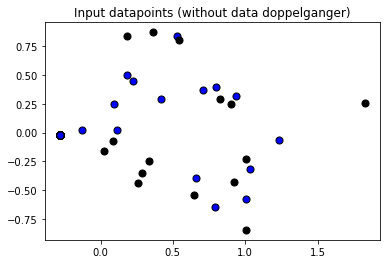

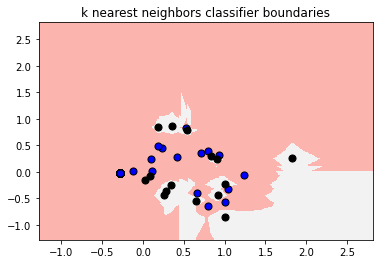

In [14]:
#KNN and draw
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets
 
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0); 

# Plot input data
plt.figure()
plt.title('Input datapoints (without data doppelganger)')
color = ["blue","black"]
mapper = np.array([color[i] for i in y])
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1],s=50, edgecolors='black', facecolors=mapper[i])

# Number of nearest neighbors to consider
num_neighbors = 5
# step size of the grid
h = 0.01  
# Create a K-Neighbours Classifier model and train it
#KNeighborsClassifier(n_neighbors=24, p=1, weights="distance")
classifier = KNeighborsClassifier(n_neighbors=24, p=1, weights="distance")
classifier.fit(X, y)

# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h),np.arange(x_min, x_max, h))

# Compute the outputs for all the points on the mesh
predicted_values = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

# Put the computed results on the map
predicted_values = predicted_values.reshape(x_grid.shape)
plt.figure()
plt.title('k nearest neighbors classifier boundaries')
plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1],s=50,edgecolors='black',facecolors= mapper[i])
plt.xlim(x_grid.min(),x_grid.max())
plt.ylim(y_grid.min(),y_grid.max())
plt.show()



In [16]:
# Cross validation and scoring functions
from sklearn.model_selection import cross_val_score
num_validations = 5
accuracy = cross_val_score(classifier,
        X, y, scoring='accuracy', cv=num_validations)
print ("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=num_validations)
print ("F1: " + str(round( f1.mean(), 2)))

precision = cross_val_score(classifier, X, y,scoring='precision_weighted', cv=num_validations)
print ("Precision: " + str(round(100*precision.mean(), 2)) + "%")

recall = cross_val_score(classifier, X, y, scoring='recall_weighted', cv=num_validations)
print ("Recall: " + str(round(100*recall.mean(), 2)) + "%")

Accuracy: 77.72%
F1: 0.73
Precision: 74.07%
Recall: 77.72%


C:\Users\yihan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yihan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yihan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yihan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

#  dataset with data doppelganger

In [17]:
import numpy as np
import pandas as pd
#please change the path 
data_2= pd.read_csv(r"C:\Users\yihan\Desktop\TB2.csv",encoding="gbk")
data_2.head()


,Sex,rs4680,rs4880,rs4994,rs5186,rs5219,rs5275,rs5443,rs7041,rs7412,target
0,1.0,GG,AG,AG,AC,CT,AA,TT,AC,CC,1.0
1,0.0,GG,AG,GG,AC,CT,AA,CT,AC,CC,1.0
2,1.0,GG,AA,AG,AC,CT,AG,CC,AC,CC,1.0
3,0.0,AA,AA,AA,AA,CC,AG,CT,AC,CC,1.0
4,1.0,GG,AG,AA,AA,CC,AG,CT,AC,CC,1.0


In [18]:
 # data process
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
for x in range(0,11):
    data_2.iloc[:,x]=data_2.iloc[:,x].fillna(data_2.iloc[:,x].mode()[0])
    enc=preprocessing.LabelEncoder()   
    data_2.iloc[:,x]=enc.fit_transform(data_2.iloc[:,x])
y2=data_2['target']
temp_data = pd.DataFrame(data_2)
X2= temp_data.drop('target', axis=1).values
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X2= data_scaler.fit_transform(X2)
 
    

In [19]:
#PCA
from sklearn.decomposition import PCA
pca_1=PCA(n_components=2)
X2=pca_1.fit_transform(X2)

<ipython-input-22-52d88559aece>:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1)


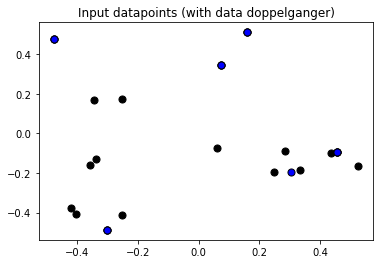

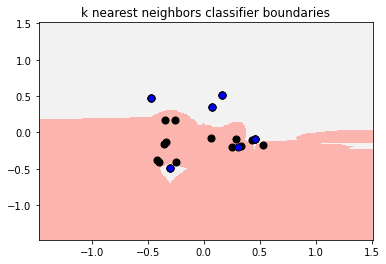

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#data_normalized =np.array(preprocessing.normalize(data,norm='l1'))
#data=np.column_stack((data_normalized,np.array(data["rs"])))
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X2= data_scaler.fit_transform(X2)
 
from sklearn.decomposition import PCA
pca_1=PCA(n_components=2)
X2=pca_1.fit_transform(X2)

X_train,X_test, y_train, y_test= train_test_split(X2,y2, test_size=0.3, random_state=0);
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets


# Plot input data
plt.figure()
plt.title('Input datapoints (with data doppelganger)')
color = ["blue","black" ]
mapper = np.array([color[i] for i in y])
for i in range(X2.shape[0]):
    plt.scatter(X2[i, 0], X2[i, 1],s=50, edgecolors='black', facecolors=mapper[i])

# Number of nearest neighbors to consider
num_neighbors = 2

# step size of the grid
h = 0.01  

# Create a K-Neighbours Classifier model and train it
classifier = KNeighborsClassifier(n_neighbors=24, p=1, weights="distance")
classifier.fit(X2, y2)

# Create the mesh to plot the boundaries
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
 
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h),np.arange(x_min, x_max, h))

# Compute the outputs for all the points on the mesh
predicted_values = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

# Put the computed results on the map
predicted_values = predicted_values.reshape(x_grid.shape)



plt.figure()
plt.title('k nearest neighbors classifier boundaries')
plt.pcolormesh(x_grid, y_grid, predicted_values, cmap=cm.Pastel1)

# Overlay the training points on the map
for i in range(X2.shape[0]):
    plt.scatter(X2[i, 0], X2[i, 1],s=50,edgecolors='black',facecolors= mapper[i])
plt.xlim(x_grid.min(),x_grid.max())
plt.ylim(y_grid.min(),y_grid.max())


plt.show()



In [23]:
# Cross validation and scoring functions
from sklearn.model_selection import cross_val_score
num_validations = 5
accuracy = cross_val_score(classifier,
        X2, y2, scoring='accuracy', cv=num_validations)
print ("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

f1 = cross_val_score(classifier, X2, y2, scoring='f1_weighted', cv=num_validations)
print ("F1: " + str(round( f1.mean(), 2)))

precision = cross_val_score(classifier, X2, y2,scoring='precision_weighted', cv=num_validations)
print ("Precision: " + str(round(100*precision.mean(), 2)) + "%")

recall = cross_val_score(classifier, X2, y2, scoring='recall_weighted', cv=num_validations)
print ("Recall: " + str(round(100*recall.mean(), 2)) + "%")

Accuracy: 93.33%
F1: 0.93
Precision: 95.0%
Recall: 93.33%
